# 10x Environment And Dependency Management With Python Poetry

## H2: Introduction
Brief overview of dependency management in Python and the challenges with traditional tools (pip, virtualenv).

Introduction to Poetry as a modern tool for managing dependencies and Python project environments.

Key benefits of using Poetry: simplicity, dependency resolution, and ease of configuration.


## H2: Comparing Python Poetry vs Pip

H3: Key differences between Poetry and pip

Explanation of pip's focus vs. Poetry’s holistic approach to project and dependency management.

Comparison of dependency resolution, virtual environment management, and ease of configuration.

H3: When to use Poetry over pip

Practical guidance on choosing between pip and Poetry for different project types and scenarios.


## Setting Up Python Poetry

You will mostly interact with Poetry as a command-line (CLI) tool so it makes sense to install it system-wide on your machine. This section covers this crucial first step and how to set some default configurations for Poetry based on your needs.

### Installing Poetry

You can install poetry using an official installer script which can be downloaded and run with a single command.

For macOS, Linux and WSL2:

```bash
$ curl -sSL https://install.python-poetry.org | sudo python3 -
```

For Windows Powershell (run with admin privileges):

```bash
$ (Invoke-WebRequest -Uri https://install.python-poetry.org -UseBasicParsing).Content | py -
```

If you are Windows and have installed Python from the Microsoft Store (for some weird reason), then replace `py` with `python` in the command above. 

After the installation script finishes, it prints a message asking you to add Poetry to your PATH so that the `poetry` command is available from everywhere.

For macOS, Linux and WSL2, add the following line to your shell script like `.bashrc` or `.zshrc`:

```bash
$ export PATH="/Users/bexgboost/.local/bin:$PATH"
```

For Windows, you can follow the output instructions.

Afterwards, verify your installation by running `poetry --version`. 

### Configuring Poetry

Most of Poetry's configuration is about how virtual environments are created and how packages are installed. You can print a (nearly) full list of Poetry configurations with:

```bash
$ poetry config --list
```

The output will look something like below:

```yaml
cache-dir = "/Users/bexgboost/Library/Caches/pypoetry"
experimental.system-git-client = false
installer.max-workers = null
installer.modern-installation = true
installer.no-binary = null
installer.parallel = true
keyring.enabled = true
solver.lazy-wheel = true
virtualenvs.create = true
virtualenvs.in-project = null
virtualenvs.options.always-copy = false
virtualenvs.options.no-pip = false
virtualenvs.options.no-setuptools = false
virtualenvs.options.system-site-packages = false
virtualenvs.path = "{cache-dir}/virtualenvs"  # /Users/bexgboost/Library/Caches/pypoetry/virtualenvs
virtualenvs.prefer-active-python = false
virtualenvs.prompt = "{project_name}-py{python_version}"
warnings.export = true
```

In the first line, we see a path to the Poetry cache. It is mainly used to store downloaded package distributions and virtual environments. Any virtual environments you create are stored here, by default. If you wish to change that, you can run the following command:

```bash
$ poetry config virtualenvs.path path/to/new/virtualenv/dir
```

Another important configuration is the number of cores used during installations. By default, it is set to four but we can make it faster by utilizing all CPU cores. First, find out your machine's number of cores by running `os.cpu_count()` in the Python Interpreter. Then, set the output:

```bash
$ poetry config installer.max-workers = 10 
```

One optional configuration is whether to create virtual environments in your working directory or in the cache. This is controlled via `virtualenvs.in-project` option. If you set it to True, `.venv` directory will always be created in your working directory:

```bash
$ poetry config virtualenvs.in-project true
```

## Creating a New Project with Poetry

Let's dive into the key steps of creating a new Poetry project and understanding its core configuration file.

### Initializing a new Poetry project
 


Poetry uage usually starts with creating a new project with the `poetry new` command:

```bash
$ poetry new explore-poetry
$ cd explore-poetry 
```

The command creates an `explore-poetry` directory pre-populated with the following files and directories:

```bash
explore-poetry
├── pyproject.toml
├── README.md
├── explore-poetry
│   └── __init__.py
└── tests
    └── __init__.py
```

This directory structure follows Python best practices:
- `pyproject.toml`: The main configuration file that defines project metadata and dependencies
- README.md: Documentation file explaining the project
- `explore-poetry/`: Source code directory containing the main package code, with `__init__.py` to make it a package
- `tests/`: Directory for test files, with `__init__.py` to make it a package (importable)

### Understanding `pyproject.toml`


Here, the `pyproject.toml` file demands a careful attention as it is the only non-empty file generated by Poetry:


```bash
[tool.poetry]
name = "explore-poetry"
version = "0.1.0"
description = ""
authors = ["BexTuychiev <bex@ibexprogramming.com>"]
readme = "README.md"

[tool.poetry.dependencies]
python = "^3.8"


[build-system]
requires = ["poetry-core"]
build-backend = "poetry.core.masonry.api"
```

This file orchestrates your project and its dependencies. It uses [Tom's Obvious, Minimal Language](https://en.wikipedia.org/wiki/TOML), which was agreed as the standard configuration language for Python packages in [PEP 518](https://peps.python.org/pep-0518/). 

All `pyproject.toml` files are divided up into sections called _tables_ using brackets like `tool.poetry` or `build-system`. Poetry uses these tables to manage dependencies, project build requirements or performing other tasks. 

As you run Poetry commands outlined in the coming sections, the `pyproject.toml` file will be automatically updated.

## Working with Virtual Environments in Poetry

In this section, you will find out the ins and outs of managing virtual environments in Poetry once you set it up. You will learn why virtual environments matter, how Poetry handles them automatically and basic commands to manipulate them like creation, activation and switching. You will also learn how to manage Python versions with Poetry.

### Creating and activating a virtual environment

When you first install Poetry, it comes with no built-in environments, as evidenced by a blank output when you run `poetry env list`:

```bash
$ poetry env list  # no output
```

But as soon as you start adding dependencies (more on that later) with `poetry add package-name`, it automatically creates an environment in the cache directory for the project. For example, let's try adding `requests` as a dependency:

```bash
$ poetry add requests
```

You should receive an output similar to the following:

```python
Creating virtualenv explore-poetry--I9GJYUn-py3.8 in /Users/bexgboost/Library/Caches/pypoetry/virtualenvs
Using version ^2.32.3 for requests

Updating dependencies
Resolving dependencies... (2.5s)

Package operations: 5 installs, 0 updates, 0 removals

  - Installing certifi (2024.8.30)
  - Installing charset-normalizer (3.4.0)
  - Installing idna (3.10)
  - Installing urllib3 (2.2.3)
  - Installing requests (2.32.3)

Writing lock file
```

The first line indicates that Poetry created the environment in the cache. The next lines inform that the dependencies for `requests` are successfully resolved and a lock file is generated (more on that later too). 

Pay attention to the environment name: `explore-poetry--I9GJYUn-py3.8`. The name includes the project directory name, followed by a unique ID and then the Python version the environment is using. 

Next time you add a dependency, Poetry automatically uses this environment to install packages:

```bash
$ poetry add beautifulsoup4
Using version ^4.12.3 for beautifulsoup4

Updating dependencies
Resolving dependencies... (1.1s)

Package operations: 2 installs, 0 updates, 0 removals

  - Installing soupsieve (2.6)
  - Installing beautifulsoup4 (4.12.3)

Writing lock file
```

When you are using Poetry, your terminal won't show which Poetry virtual environment is active. To see this information, you need to run `poetry env list`:

```bash
$ poetry env list
explore-poetry--I9GJYUn-py3.8 (Activated)
```

To interact with the active Poetry environment, you can run `poetry shell`:

```bash
$ poetry shell
```

The command opens a new shell session within the current one and you can execute commands like `python` or `pytest`. 

For example, to execute Python scripts:

```bash
$ poetry shell
$ python script.py
```

For running dev frameworks like Streamlit:
```bash
# Inside the shell
$ streamlit run app.py
```

Afterward, you can exit the shell by calling `exit`.

Alternatively, you can run commands in the Poetry shell without entering it with `poetry run`:

```bash
$ poetry run python script.py
$ poetry run streamlit run app.py
```

### Configuring the Python version

When you run `poetry add` or `poetry install`, Poetry automatically uses the Python version specified in your `pyproject.toml` file. To specify a different Python version, you can run `env use` command:

```bash
$ poetry env use python3.11
```

> Note that Python 3.11 must be installed system-wide on your machine for the command to work.

Check that Poetry is using the environment with the new Python version:

```bash
$ poetry env list
explore-poetry--I9GJYUn-py3.11 (Activated)
explore-poetry--I9GJYUn-py3.8
```

Notice how the new environment is automatically attached to our project (the IDs are the same). Once you configure your Python version, you can remove environments with other versions to free up disk space:

```bash
$ poetry env remove python3.8
```

When deleting an environment, you only have to specify the Python version. You can also delete all environments and start from scratch:

```bash
$ poetry env remove --all
```

Do note that `--all` tag removes all environments associated with the current project, not environments of other projects.

If you are working on team projects, it is often better to keep the virtual environment in the project directory:

```bash
$ poetry config virtualenvs.in-project true
```

> This command won't have any effect if you already have an environment for the project in the cache. To create a local environment, remove all existing ones from the cache first.

This creates a `.venv` folder in your working directory, which you should add to your `.gitignore` file.

## Managing Dependencies with Poetry

Dependency management is where Poetry shines. It provides comprehensive features to specify, install and manage dependencies so that you never run into hellish dependency conflicts. In this section, you will learn about adding and installing dependencies, creating dependency groups, dependency specification syntax in `pyproject.toml` and lock files.

### Adding dependencies in Poetry

When using Poetry, you will use the `poetry add package-name` command to install packages from PyPI instead of `pip install`. This has a few benefits:

1. Automatically adds the package to pyproject.toml with the correct version constraint
2. Updates the lock file to ensure reproducible builds
3. Resolves dependencies to avoid conflicts
4. Installs the package and all its dependencies in the virtual environment

For example, let's first add Numpy as a dependency:

```bash
$ poetry add numpy
```

Immediately, you should receive a dependency resolve conflict that says the Numpy version that is being installed is not compatible with your Python version. The reason is that when we switched to the Python 3.11 environment, we didn't update the `pyproject.toml` file. Right now, it looks like this:

```bash
[tool.poetry.dependencies]
python = "^3.8"
requests = "^2.32.3"
beautifulsoup4 = "^4.12.3"
```

The caret symbol `^` is used to indicate that our `explore-poetry` project is compatible with any Python version up to Python 4 but Numpy's version range only supports Python versions between 3.8 and 3.12, which is a narrower range. The conflict error comes from that fact. 

So, to fix the error, you should update the Python version range to the following:

```bash
python = ">=3.8, <3.12"
```

Once you make this change, `poetry add numpy` command should work as expected. 

---------

You've just observed one of the best features of Poetry - catching version conflicts before installing any packages instead of informing you about the version incompatibilities afterward, like `pip`. 

### The syntax for specifying dependency versions

Poetry uses a powerful syntax to specify a wide range of versions for best synchronization between dependencies. Here are the symbols most often used:

1. Caret (^): Allows patch and minor updates but not major. Example: `^1.2.3` allows updates from 1.2.3 to 1.9.9 but not 2.0.0.

2. Tilde (~): Allows only patch updates. Example: `~1.2.3` allows updates from 1.2.3 to 1.2.9 but not 1.3.0.

3. Exact version: Specifies exact version number. Example: `1.2.3` only allows version 1.2.3

4. Greater than (>): Allows any version above specified. Example: `>1.2.3` allows 1.2.4, 1.3.0, 2.0.0, etc.

5. Less than (<): Allows any version below specified. Example: `<2.0.0` allows anything below 2.0.0.

6. Greater than or equal (>=): Allows specified version and above. Example: `>=1.2.3` allows 1.2.3 and any higher version.

7. Less than or equal (<=): Allows specified version and below. Example: `<=2.0.0` allows 2.0.0 and any lower version.

8. Version range: Combines constraints with commas. Example: `>=1.2.3,<2.0.0` allows versions from 1.2.3 to 1.9.9

9. Wildcard (*): Matches any version. Example: `1.2.*` matches any version starting with 1.2

Of course, you can mix-and-match these to suit your needs.

### Creating dependency groups in Poetry

In complex projects with a lot of moving components, you often deal with different categories of dependencies. 

For example, in a machine learning project, you often create different pipelines and components for data ingestion, data cleaning, feature engineering, model training, deployment and monitoring. Not to mention, you also have to complete documentation and run tests. All these steps have their own ecosystem of tools and mixing their dependencies bloats your final distribution package. 

With Poetry, you can create dependency groups with arbitrary names so that you can install them only when needed. Or the best part - users of your package may also choose to install the parts they need. 

```bash
$ poetry add --group ui streamlit plotly dash
$ poetry add --group dev black flake8 isort mypy pylint
```

The above commands create two dependency groups, `ui` and `dev` (if they don't already exist), and two sub-tables in `pyproject.toml`:

```bash
[tool.poetry.dependencies]
python = "^3.11"
requests = "^2.32.3"
beautifulsoup4 = "^4.12.3"
numpy = "^2.1.3"


[tool.poetry.group.ui.dependencies]
streamlit = "^1.39.0"
plotly = "^5.24.1"
dash = "^2.18.2"


[tool.poetry.group.dev.dependencies]
black = "^24.10.0"
flake8 = "^7.1.1"
isort = "^5.13.2"
mypy = "^1.13.0"
pylint = "^3.3.1"
```

Even though dependency groups are separated, they are still resolved against each other. In other words, if there is a `dev` dependency conflicting with a package in `ui`, Poetry won't run the install. 

In some cases, you may create optional dependency groups or make existing groups optional so that they are not installed by default when a user recreates your project environment. To do so, you have to create a new sub-table in the `pyproject.toml` file. For example, we will make the `ui` group optional below:

```bash
[tool.poetry.group.ui]
optional = true

[tool.poetry.group.ui.dependencies]
streamlit = "^1.39.0"
plotly = "^5.24.1"
dash = "^2.18.2"
```

It is done by setting the `optional` parameter to `true` before declaring the group's dependencies. 

### Reproducing a Poetry project with `poetry.lock` file 

If someone clones your GitHub repository containing a Poetry project, they can recreate a perfect copy of the virtual environment for your project by running a single command: `poetry install`. 

The `install` command uses the much-more comprehensive `poetry.lock` file. Unlike `pyproject.toml`, the lock file lists:
- The exact versions of main dependencies listed in `pyproject.toml`
- The exact versions of the dependencies of the main dependencies (transitive dependencies)

For example, `requests` depends on `urllib3`, `certifi`, `charset-normalizer` and `idna`. Without a lock file, these sub-dependencies could resolve to different versions on different machines. 

The lock file ensures that everyone on your team gets exactly the same dependency versions, preventing the "it works on my machine" problem. 

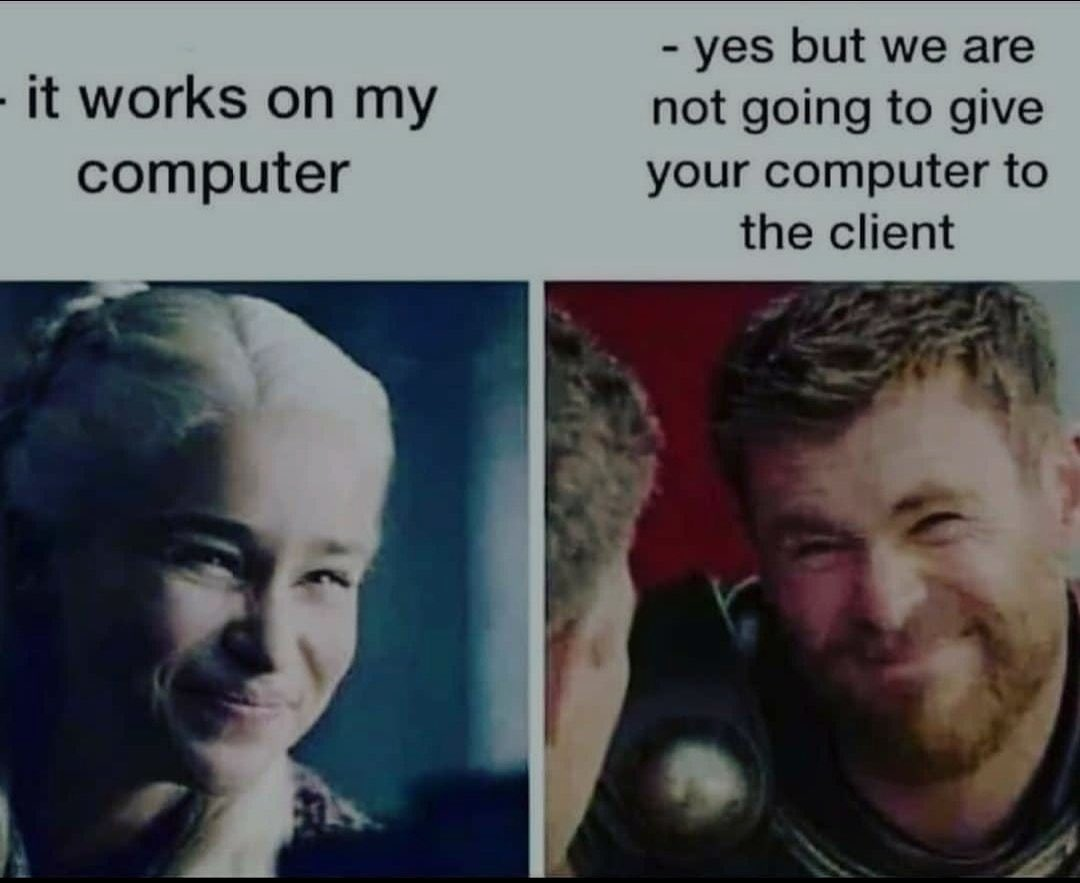

### The difference between `poetry add` and `poetry install`

We'll explain the difference between `add` and `install` commands of Poetry with a use-case. 

Let's say you are working on a fraud detection project. You add your initial dependencies:

```bash
$ poetry add pandas scikit-learn
```

This add the packages to the lock and `pyproject.toml` files. Then, your colleague clones the repo:

```bash
$ git clone fraud-detection-repo-link
$ cd fraud-detection
$ poetry install
```

They run the `install` command to install everything listed in the lock file. 

Later, you need to add a new package:

```bash
$ poetry add xgboost
```

Your colleague pulls the changes:

```bash
$ git pull
$ poetry install
```

They run the `install` command to install the new package. So,
- Use `poetry add` when you add new dependencies
- Use `poetry install` when you need to set up an existing project
- Always commit `pyproject.toml` and `poetry.lock` to version control

### Installing dependency groups with `poetry install` command

Earlier, we learned how to group dependencies in Poetry. When you run `poetry install`, it installs all non-optional groups by default, which may not be what you want in all the cases.

For example, you may be cloning a repository only to work on the docs. Or you want to work on the repository's main code, except the documentation and testing aspects. The `install` command is flexible enough to cover all these cases:

Excluding certain groups:

```bash
$ poetry install --without ui,dev
```

Installing optional groups as well:

```bash
# Installing the optional docs group
$ poetry install --with docs
```

Installing only specific groups:

```bash
$ poetry install --only ui
```

Installing only the project's runtime dependencies (the dependencies mentioned outside of groups, added with plain `poetry add package` commands):

```bash
$ poetry install --only main
```

### Removing dependencies in Poetry

Deleting a dependency is straightforward using the `remove` command:

```bash
$ poetry remove requests
```

This removes `requests` from the main project dependencies. To remove a package from a group dependency, you can use the `--group` tag again:

```bash
$ poetry remove streamlit --group ui
```

The `remove` command cleanly uninstalls the package, along with its transitive dependencies.

## Publishing a Project with Poetry to PyPI

If your project is ready for distribution, publishing it to PyPI (Python Package Index) allows other developers to easily install and use your code through `pip`. Poetry makes this process a complete breeze with just two commands:

```bash
$ poetry build  # Build distributions
$ poetry publish  # Publish to PyPI
```

Before you run these commands, however, you should set up your PyPI credentials correctly. First, create your accounts at:

1. [PyPI](https://pypi.org/account/register/)
2. [TestPyPI](https://test.pypi.org/account/register/)

Configure Poetry with your PyPI credentials:

```bash
$ poetry config pypi-token.pypi your-pypi-token
$ poetry config pypi-token.testpypi your-test-pypi-token
```

Now, test your package first:

```bash
# Configure TestPyPI repository
$ poetry config repositories.testpypi https://test.pypi.org/legacy/

# Publish to TestPyPI
$ poetry build
$ poetry publish -r testpypi
```

After publishing to TestPyPI, you can try installing your package to test everything is working well:

``` bash
$ $ pip install --index-url https://test.pypi.org/simple/ your-package-name
```

If all is well, you can publish to PyPI itself:

```bash
$ poetry publish
```

## Best Practices When Working With Poetry

There are many gotchas and best practices when using Poetry and of course, we can't mention them all in a single article. But, here are some common ones you can apply straight away:

1. Always use virtual environments - Poetry creates them automatically for each project

2. Keep your `pyproject.toml` file under version control but exclude `poetry.lock` for libraries

3. Include `poetry.lock` in version control for applications to ensure reproducible builds

4. Use semantic versioning for your package versions (major.minor.patch). You can use `poetry version patch/minor/major` commands to increase the package versions by one. For example, `poetry version major` changes `0.2.0` to `1.0.0` in your `pyproject.toml` file.

5. Specify dependency version constraints carefully to avoid conflicts

6. Regularly update dependencies with `poetry update` but test thoroughly after updates

7. Use `poetry add --group dev` for development dependencies to keep them separate

8. Document all dependencies' purposes in `pyproject.toml` using comments

9. Run `poetry check` before commits to validate `pyproject.toml` syntax. You can also consider [pre-commit hooks](https://python-poetry.org/docs/pre-commit-hooks/). 

10. Use `poetry export` to generate `requirements.txt` when needed for other tools.

11. Keep production dependencies minimal - move optional features to extras

12. Test your package installation in a clean environment before publishing

13. Use TestPyPI before publishing to the main PyPI repository

14. Maintain a clear `CHANGELOG.md` to track version changes

15. Use `poetry run` for script execution to ensure correct environment usage


## Conclusion and Next Steps


Poetry has revolutionized Python dependency management by providing a robust, intuitive solution to common package management challenges. Its powerful features for dependency resolution, virtual environment management, and project publishing make it an invaluable tool for modern Python development.

To continue your Python development journey, consider exploring these comprehensive learning paths:

- [Python Programming Track](https://www.datacamp.com/tracks/python-programming) - Master Python fundamentals and advanced concepts
- [Intermediate Python](https://www.datacamp.com/courses/intermediate-python) - Level up your Python skills
- [Python Data Fundamentals](https://www.datacamp.com/tracks/python-data-fundamentals) - Learn essential data manipulation skills
- [Associate Data Scientist in Python](https://www.datacamp.com/tracks/associate-data-scientist-in-python) - Dive into data science with Python

Remember, effective dependency management is just one aspect of professional Python development. As you continue to grow as a developer, tools like Poetry will help you build more maintainable and reliable Python projects.
